In [97]:
# Initial Imports
import os
import plaid

import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [98]:
def pretty_print_response(response):
    
    print(json.dumps(response, indent=4, sort_keys=True))

In [99]:
# Set environment variables from the .env file
# Could not re add .env after complications with deleting it
load_dotenv()

True

In [100]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")


In [101]:
from plaid import Client

In [102]:
# Create the client object
client = Client(
    client_id = '5f13134d09ec71001107e76e',
    secret='f9fba6df7f9b57d0c53dc91f59865a',
    environment="sandbox",
    api_version='2019-05-29'
)

In [103]:
 # Set the institution id
INSITUTION_ID = "ins_109508"

In [104]:
 # Create the public token
create_response = client.Sandbox.public_token.create(
    INSITUTION_ID,
    ["transactions", "income", "assets"]
)
pretty_print_response(create_response)

{
    "public_token": "public-sandbox-bd147a4a-7fd0-4391-b634-da377128ce21",
    "request_id": "HuZFfNimJWRsbea"
}


In [105]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_response["public_token"])

# Print the access token
pretty_print_response(exchange_response)

{
    "access_token": "access-sandbox-47679010-b183-4f9b-9475-dc375dba5855",
    "item_id": "RbjJBMkpBvcw641yMr9vi9owmy46GpFRBqg67",
    "request_id": "Q1zb3isoOsCR39S"
}


In [106]:
# Store the access token in a Python variable
access_token = exchange_response["access_token"]

In [107]:
# Retrieve accounts
accounts = client.Accounts.get(access_token)

# Print accounts
pretty_print_response(accounts) 

{
    "accounts": [
        {
            "account_id": "VKkopLVEpvt7jpWzlnQ1fpvJMW7qE7iWP4WEd",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "wrQD3lyk3MCwgMa8eQj9ikAPnvXa9XCrovrmm",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

In [108]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Print the transactions
pretty_print_response(transactions_response["transactions"][:1])

[
    {
        "account_id": "JoBdkxAjkvCExNoaGMkLflEX3kxQ6xCdgEdkX",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-07-29",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "United Airlines",
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "refer

In [109]:
# Create a for-loop to print the categories for each transaction
for transaction in transactions_response["transactions"]:
    print(transaction["category"])

['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']


In [110]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
transaction_df = pd.DataFrame(columns=["date", "name", "amount", "category"])

# Retrieve all the transactions
transactions = transactions_response["transactions"]

# Populate the transactions DataFrame with the transactions data
for index, transaction in enumerate(transactions):
    transaction_df.loc[index] = [transaction["date"], transaction["name"], transaction["amount"], transaction["category"][0]]

# Display sample data from the DataFrame    
transaction_df.head()

,date,name,amount,category
0,2020-07-29,United Airlines,500,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-07-23,KFC,500,Food and Drink


In [111]:
# Display data types
transaction_df.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [112]:
# Make any required data type transformation
transaction_df["amount"] = transaction_df["amount"].astype("float")
transaction_df["date"] = pd.to_datetime(transaction_df["date"], format="%Y-%m-%d")

In [113]:
# Set the date column as index
transaction_df = transaction_df.set_index("date")

# Display sample data
transaction_df.head()

,name,amount,category
date,,,
2020-07-29,United Airlines,500.00,Travel
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2020-07-24,Tectra Inc,500.00,Food and Drink
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-07-23,KFC,500.00,Food and Drink


In [114]:
# Fetch de income data
income_response = client.Income.get(access_token)

# Print the income data
pretty_print_response(income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "K5JOEHR32BSABl3"
}


In [115]:
# Determine the previous year's gross income and print the results
print(f"Last Year's income: {income_response['income']['last_year_income_before_tax']}")

Last Year's income: 7285


In [116]:
# Determine the current monthly income and print the results
print(f"Current monthly income: {income_response['income']['income_streams'][0]['monthly_income']}")

Current monthly income: 500


In [117]:
# Determine the projected yearly income and print the results
print(f"Projected Year's income: {income_response['income']['projected_yearly_income_before_tax']}")

Projected Year's income: 7389


In [124]:
# Compute the total expenses per category
totals_by_category = transaction_df.groupby("category").sum()["amount"]

# Display the expenses per catefory
totals_by_category

category
Food and Drink    1105.73
Payment           2103.50
Recreation          78.50
Shops              500.00
Transfer          6845.78
Travel              11.73
Name: amount, dtype: float64

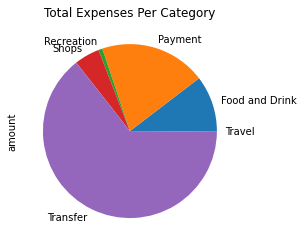

In [125]:
# Create a spending categories pie chart.
totals_by_category.plot.pie(title="Total Expenses Per Category")

#This graph illustrates the dollar amout per category in order to visulize the above information.

In [126]:
# Create a DataFrame with the total expenses
transactions_per_month = transaction_df.reset_index()
transactions_per_month["month"] = pd.DatetimeIndex(transactions_per_month["date"]).month
transactions_per_month = transactions_per_month.groupby("month").sum()

# Display sample data
transactions_per_month

,amount
month,
7,10645.24


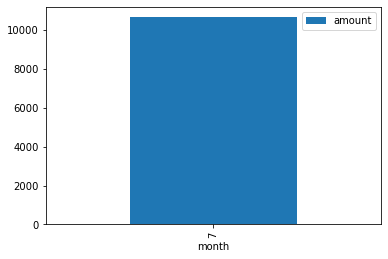

In [128]:
# Create a spending per month bar chart

# This bar chart represents the amount of monthly spending

# It also seemed to decrease the amount of months represented each time I reran the notebook
transactions_per_month.plot.bar()